In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
class LinearRegression:
    def __init__(self):
        self.b0 = None
        self.b1 = None
        self.cost_history = []
    
    def check(self, X, Y):
        if isinstance(X, pd.DataFrame):
            X = pd.Series(X['0'])
        if isinstance(Y, pd.DataFrame):
            Y = pd.Series(Y['0'])
        return X, Y

    def error(self, X, Y):
        X, Y = model.check(X, Y)
        return np.mean((self.predict(X) - Y) ** 2) / 2

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        X, Y = model.check(X, Y)
        self.b0 = 0
        self.b1 = 0
        steps = 0
        prev_cost = 0
        errors = []
        while steps < max_steps:
            new_err = model.error(X, Y)
            errors.append(new_err)
            Y_pred = self.b0 + self.b1 * X
            error = Y_pred - Y
            cost = np.mean(error ** 2) / 2
            self.cost_history.append(cost)
            if abs(prev_cost - cost) < accuracy:
                print(f"Reached desired accuracy after {steps} steps")
                break
            prev_cost = cost
            self.b0 -= alpha * np.mean(error)
            self.b1 -= alpha * np.mean(error * X)
            steps += 1
        if steps == max_steps:
            print("Reached maximum number of steps")
        return steps, errors

    def predict(self, X):
        X, _ = model.check(X, None)
        return self.b0 + self.b1 * X

    def plot(self, X, Y):
        X, Y = model.check(X, Y)
        Y_pred = self.predict(X)
        plt.scatter(X, Y)
        plt.plot(X, Y_pred, color='red')
        plt.show()

    def plot_learning_curves(self):
        plt.plot(self.cost_history)
        plt.show()

In [16]:
# Загрузка данных
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']

Reached desired accuracy after 2737 steps
error after gradient descent: 4.4961047667431675


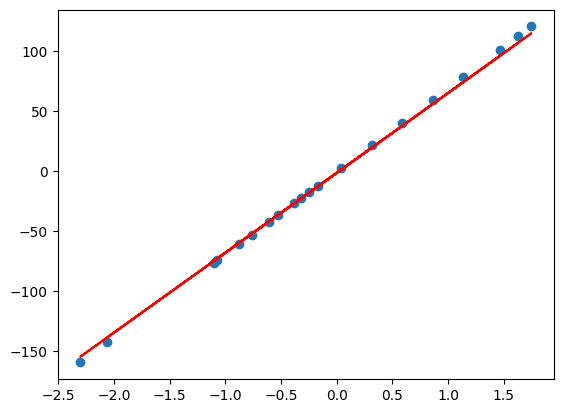

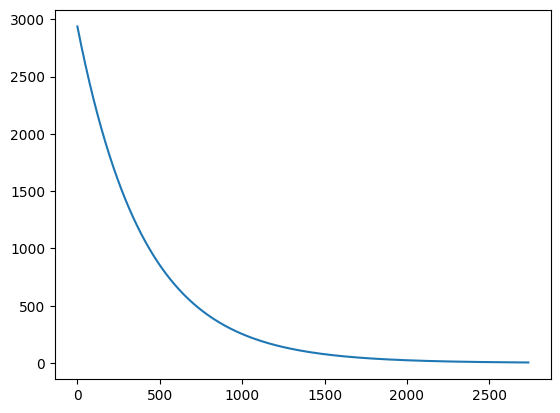

In [17]:
# Создание объекта модели
model = LinearRegression()

# Обучение модели
steps, errors = model.fit(x, y)

#Ошибки
J = model.error(x, y)
print("error after gradient descent:", J)

# Предсказание значений на тестовых данных
y_pred = model.predict(x)

# Построение графика
model.plot(x, y)

# Построение кривых обучения
model.plot_learning_curves()


In [18]:
# Задание 1
hyp = LinearRegression()
hyp.b0 = 10
hyp.b1 = -5
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

Reached desired accuracy after 2737 steps
error after gradient descent: 4.4961047667431675


In [19]:
# Задание 2
steps, errors = hyp.fit(x, y, alpha=0.1)
J = hyp.error(x, y)
print("error after gradient descent:", J)

Reached desired accuracy after 48 steps
error after gradient descent: 0.0352205724003429


In [20]:
# Задание 3
x1 = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)
a1, a2 = model.check(x1,y)
type(x1), "to", type(a1)

(pandas.core.frame.DataFrame, 'to', pandas.core.series.Series)

In [21]:
task_4 = """ Задание 4

if abs(prev_cost - cost) < accuracy:
                print(f"Reached desired accuracy after {steps} steps")
                break
"""

In [22]:
task_5 = """ Задание 5
в данной реализации алгоритма градиентного спуска он завершается всегда
либо при достижении заданной точности accuracy,
либо при достижении максимального количества шагов max_steps."""

In [23]:
class Task6(LinearRegression):
    def fit(self, X, Y, alpha=1, accuracy=0.01, max_steps=5000, decrease=2):
        X, Y = model.check(X, Y)
        n = len(X)
        self.b0 = 0
        self.b1 = 0
        steps = 0
        prev_cost = 0
        increase_count = 0 # счетчик увеличения ошибки
        errors = []
        while steps < max_steps:
            errors.append(model.error(X, Y))
            Y_pred = self.b0 + self.b1 * X
            error = Y_pred - Y
            cost = np.mean(error**2) / 2
            self.cost_history.append(cost)
            if abs(prev_cost - cost) < accuracy:
                print(f"Reached desired accuracy after {steps} steps")
                break
            prev_cost = cost
            self.b0 -= alpha * np.mean(error)
            self.b1 -= alpha * np.mean(error * X)
            steps += 1
            # проверка, увеличивается ли ошибка после одного шага
            if steps == 1 and cost > prev_cost:
                increase_count += 1
            # если ошибка увеличивается после одного шага
            # уменьшаем скорость обучения и перезапускаем градиентный спуск
            elif increase_count == 1 and cost > prev_cost:
                alpha /= decrease
                print("alpha", alpha)
                self.b0 = 0
                self.b1 = 0
                steps = 0
                prev_cost = 0
                increase_count = 0
            else:
                increase_count = 0 # сброс счетчика, если ошибка не увеличивается
        if steps == max_steps:
            print("Reached maximum number of steps")
        return steps, errors

Reached desired accuracy after 6 steps
error after gradient descent: 0.0008603627290350643


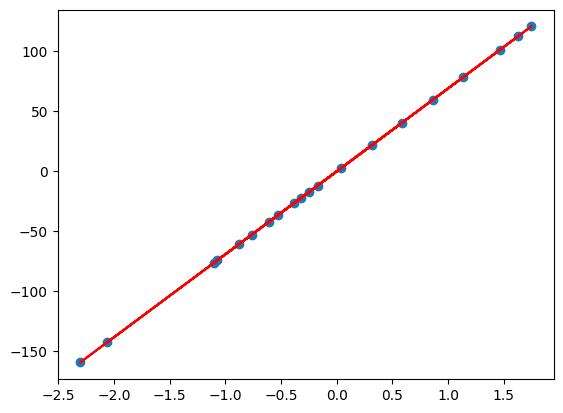

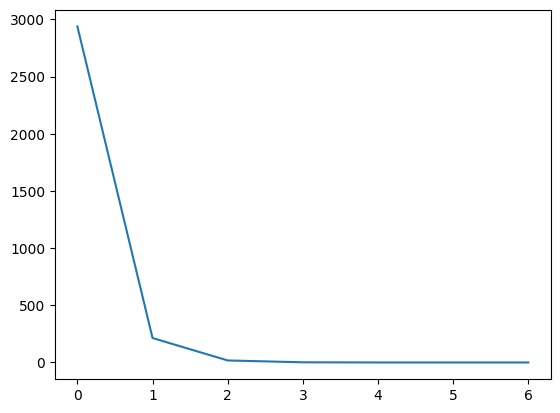

In [24]:
# Создание объекта модели
model = Task6()

# Обучение модели
steps, errors = model.fit(x, y)

#Ошибки
J = model.error(x, y)
print("error after gradient descent:", J)

# Предсказание значений на тестовых данных
y_pred = model.predict(x)

# Построение графика
model.plot(x, y)

# Построение кривых обучения
model.plot_learning_curves()


In [25]:
task_7=""" Задание 7

def plot(self, X, Y):
        X, Y = model.check(X, Y)
        Y_pred = self.predict(X)
        plt.scatter(X, Y)
        plt.plot(X, Y_pred, color='red')
        plt.show()

    def plot_learning_curves(self):
        plt.plot(self.cost_history)
        plt.show()
"""